<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Modeling Case Study
---------

DAT-5329 | Introduction to Machine Learning & AI

By Victor Isakov<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Analysis
----------
-----------------------------------------------------------------
----------------------------------------------

Introduction:
----------

    The following analysis is done to have a better understanding of low birth weights. Particularly, the analysis is performed on data about parents and some of their socioeconomic characteristics which help to understand birth weight of their newborns. The main idea is to predict low birth weight prior to the event. It helps to analyze potential expenses for parents and which steps should be taken regarding the risks. It is better to identify false low birth weight rather than not to predict it which comes from multiple reasons: legal for doctors, mental and health risks for parents, and even legal for hospitals or similar institutions.
    
    
Analysis Questions:
----------

    1. Are there any strong positive or strong negative linear (Pearson) correlations with birth weight?
    
    The provided dataset has no strong correlations with birth weight. The largest correlation of 0.18 connects number of prenatal visits to a newborn birth weight prediction. It could be due to the fact that the more visits there were prior to birth, the more parents care about a kid and it's future health. It means that if there were any concerns, they could be resolved faster and with a higher chance of success. Also, father's age has a correlation of 0.14 as the older fathers supposed to have a higher chance of getting "weaker" babies and such babies might be in the category of a low weight. (Miller, 2018) Other correlations are very minor and don't predict newborn birth weight well.
    
    
    
    2. Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight?
    
    There is an official threshold that signifies low birth weight which is identified by WHO. (World Health Organization) It is below 2500 grams when it the newborn weight is considered dangerous. There are numerous short and long term affects to both the mother and a child that can be caused due to a low weight. Newborns with low weight can be blind, deaf, or have developmental delays. Which signifies the reason to have a better understanding of baby health prior to it's birth. Identification of this factor can help to treat the baby and mother prior to birth and evaluate the risks for both as well as treat them. (Stanford Children’s Health)
    
    
    
    3. After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not?
    
    After transforming the birth weight into binary system - the coefficients actually went lower than before. Now, the highest coefficient is 0.12 for the number of prenatal visits which was 0.18 before transformation. The phi coefficients also didn't improve. This might happen due to the data limitations. This particular amount of data might not represent industry standards or showcase another fact that predicting low birth weight is harder with the given features. At the same time, there is a different threshold for this  particular data which can slightly improve correlations if the birth weight is transformed in such manner. 
    
    
    
    4. Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these.
    
    - The largest impact had my feature that was engineered to show the affect of age of both parents with number of prenatal visits (age_vis). As I assumed, older parents might want to go earlier to prenatal care due to potential health risks for the mother and a child. It shows the greatest impact based on the visualization of GBM model feature impact as well as RandomForestClassifier. This feature has a correlation of -0.11 with a low_birthweight feature and is the second best even in correlation matrix. Also, this feature helps the algorithm to better understand how age of parents and number of prenatal visits impact low birth weight despite lower correlation than just number of visits on it's own.
    An action taken from this insight is to suggest older parents increase number of prenatal visits in order to increase chances of a healthier baby and decrease low birth weight risks earlier. Also, it supports the idea that if older people go to the healthcare institution earlier, they might predict the birthweight earlier and counter any potential risks.
    
    - The second most important feature in my final ML algorithm is socio economic status (ses_indicator). It shows as the second best in visualizations of both GBM Classifier as well as RandomForestClassifier. Despite having a correlation of -0.07, it brings a great value to the model and provides it with helpful insights about parents again. It covers parental education, health, and how knowledgeable they are about visits to the doctor regarding pregnancy. This feature drives the idea that socio economic factors are important in predicting baby's future health through finding potentially low weight of newborns.
    This feature will help to support the idea that healthier and more educated parents have a better chance of getting healthy baby of a normal birth weight. It means that there could be campaigns regarding education and heath of parents to promote healthier parents. Such action will improve chances of having baby born with normal weight. 
    
    
    5. Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error.
    
    Here is the confusion matrix from the final GBM Tuned model:
    
    True Negatives : 73
    False Positives: 10
    False Negatives: 13
    True Positives : 7
    
    This is the confusion matrix for the Test Data.
    False positives show how many times the model predicted low birth weight when in reality it wasn't.
    False negatives show how many times the model didn't predict low birth weight when in reality it was.
    
    TP/(TP+FP) = 7/17         = 0.41
    FN/(TN+FP+FN+TN) = 13/103 = 0.13
    
    The most important error to decrease is False negatives because in reality it's better to have False Positives. It would be better because predicting low birth weight is better due to ability to take appropriate actions on that, including more detailed checks and further health control. If you don't predict a low birth weight, parents, baby, and even hospital/doctors might get into larger problems further.
    
    I tried to decrease the number of False Negatives while increasing TP/(TP+FP) ratio. I reached the highest results with this GBM Tuned model. I believe, with such features it would be a good probability overall.

-------------------------------------------------------------
References:

     
     Miller, M. (2018, October 31). Older fathers associated with increased birth risks. Stanford Medicine News Center. Retrieved from Stanford Medicine. https://www.med.stanford.edu/news/all-news/2018/10/older-fathers-associated-with-increased-birth-risks.html
     Stanford Children’s Health. (n.d.). Low birth weight. Retrieved from https://www.stanfordchildrens.org/en/topic/default?id=low-birth-weight-90-P02382 
     World Health Organization. (n.d.). Low birth weight. https://www.who.int/data/nutrition/nlis/info/low-birth-weight
---------------------------------------------------
---------------------------------------------------

In [2]:
## importing libraries ##
import numpy             as np                         # mathematical essentials
import pandas            as pd                         # data science essentials
import sklearn.linear_model                            # linear models
from sklearn.model_selection import train_test_split   # train/test split
from sklearn.metrics import mean_squared_error         # mean squared error 
from sklearn.preprocessing import StandardScaler       # Standard Scaler
import warnings                                        # warnings from code
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
import matplotlib.pyplot as plt                        # visualizations
import seaborn           as sns                  # enhanced visualization
import phik
from sklearn.preprocessing import power_transform    # yeo-johnson
# model results
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.ensemble import GradientBoostingClassifier# GBM classifier
from sklearn.metrics import (precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## importing data ##
# reading modeling data into Python
modeling_data = './birthweight.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         header     = 0,
                         index_col  = 'bwt_id')

# reading testing data into Python
testing_data = './kaggle_test_data.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        header     = 0,
                        index_col  = 'bwt_id')

# concatenating datasets together for my analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for my analysis and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

# checking data
df_full.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
bwt_id,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle


Exploratory Data Analysis (EDA) and Data Preprocessing (DP)
-------------------------

In [3]:
# Checking Null Values
df_full.isnull().sum()

mage       0
meduc      6
monpre     0
npvis     21
fage       1
feduc     10
omaps      2
fmaps      2
cigs      33
drink     32
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

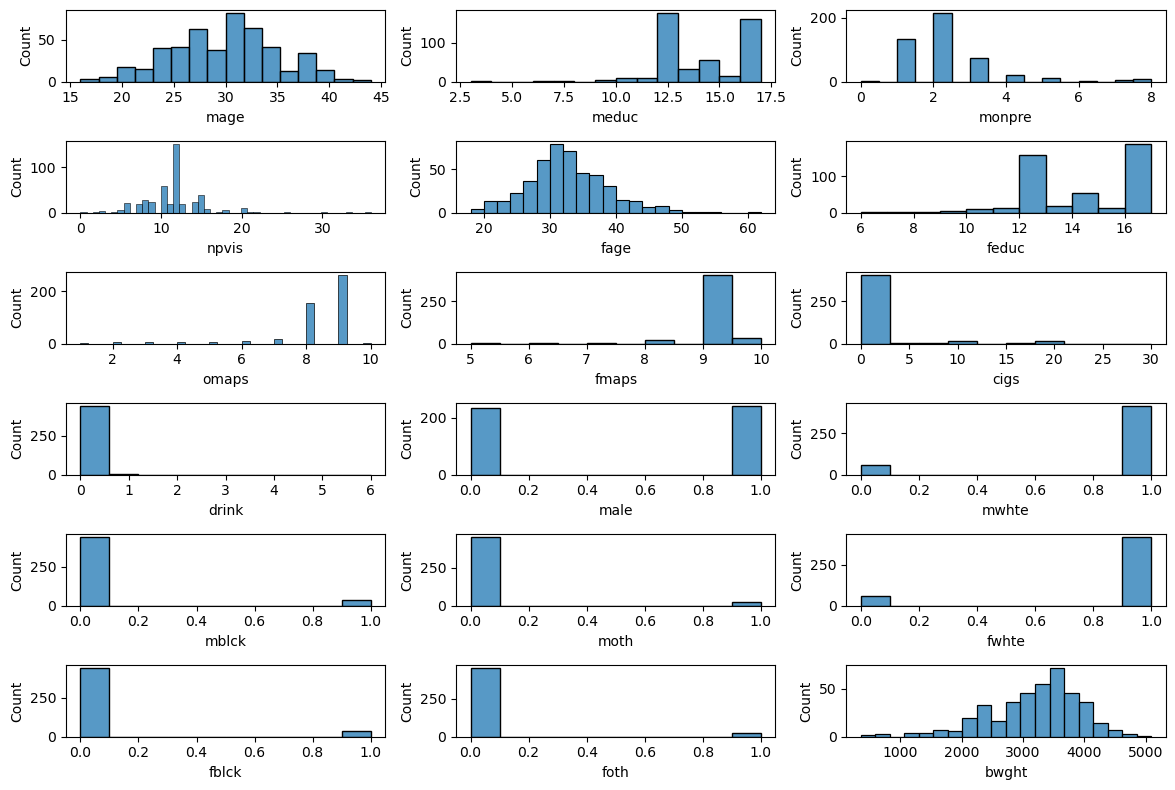

In [4]:
#Creating a Visualization of all feature distributions. It helps to understand the further
#strategy for imputations. Moreover, it helps to understand the skewness of the distributions.
#Also, this visualization shows which variables are descrete and which ones are continous. 
#It is really important to analyze this visual to have a better view on which features might have correlations
#and which ones look more random or unrelated.


# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))
ax.remove()

# initializing a counter
count = 0


# looping to create visualizations
for col in df_full:

    # condition to break
    if count == 18:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(6, 3, count)
    sns.histplot(x = df_full[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

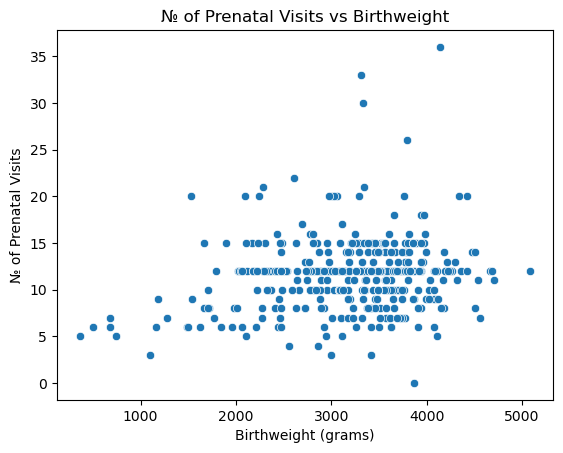

In [5]:
#Here, I decided to check the distribution of Prenatal Visits and its relationship with birthweight.
#At first glance, it seems that these features are not dependent because the points are scattered all over.
#But when we take a closer look - we identify a slight positive correlation. Later in our correlation matrix,
#we will see a relation of 0.18 which is a weak positive correlation.
#Also, as mentioned previously, despite having an official threshold regarding low birthweight,
#we can clearly see that around a weight of 2000g there is a significant decrease in the number of
#prenatal visits. Which means, that this dataset might not be a great representation of the real world data
#or number of prenatal visits is not such a significant predictor.

#creating a scatterplot with seaborn
sns.scatterplot(x='bwght', y='npvis', data=df_full)

#Adding title and labels
plt.title('№ of Prenatal Visits vs Birthweight')
plt.xlabel('Birthweight (grams)')
plt.ylabel('№ of Prenatal Visits')

#Showing the plot
plt.show()

In [6]:
#Dropping two columns that happened after the event horizon
df_full = df_full.drop(['omaps','fmaps'],axis=1)
##############################################################################


#finding median of Mother's Education
meduc_median = df_full['meduc'].median()

# #Imputing missing values with Median due to skewness of the distribution
df_full['meduc'].fillna(meduc_median, inplace=True)

##############################################################################

#finding median of Number of Prenatal Visits
meduc_median = df_full['npvis'].median()

#Imputing missing values with Median due to skewness of the distribution
df_full['npvis'].fillna(meduc_median, inplace=True)
##############################################################################

#finding median of Father's Education
meduc_median = df_full['feduc'].median()

#Imputing missing values with Median due to a slight skewness of the distribution
df_full['feduc'].fillna(meduc_median, inplace=True)
##############################################################################

#finding median of Father's Age
meduc_median = df_full['fage'].median()

#Imputing missing values with Median due to skewness of the distribution
df_full['fage'].fillna(meduc_median, inplace=True)
##############################################################################

#finding median of Average cigs per day
meduc_median = df_full['cigs'].median()

#Imputing missing values with Median due to skewness of the distribution
df_full['cigs'].fillna(meduc_median, inplace=True)
##############################################################################

#finding median of Average drinks per day
meduc_median = df_full['drink'].median()

#Imputing missing values with Median due to skewness of the distribution
df_full['drink'].fillna(meduc_median, inplace=True)
##############################################################################


#Tranforming continuous birthweight to a low_birthweight as 1 when below 2500 otherwise 0
df_full['low_bwght'] = (df_full['bwght'] < 2500).astype(int)

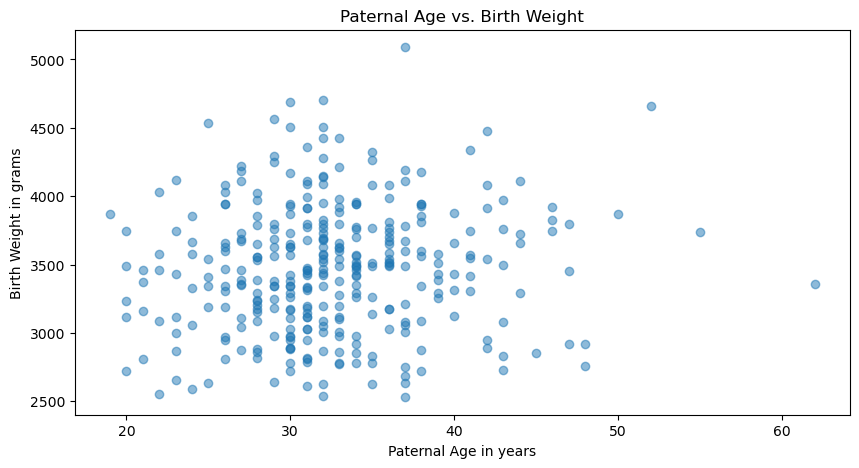

In [7]:
#I wanted to check the correlation of difference of father's age and how it affects child's birthweight.
#It became more clear that there is almost no difference in how old the father.
#Despite my research, this factor alone can't contribute to a lower or higher birthweight.
#Which means that this feature is rather a part of a complex predictor than a simple linear correlation.
#It made me realize that such features need to be combined with other features to create more complex
#relationships that will add more insights to the model algorithm.

df_low_bwght = df_full[df_full['bwght'] < 2500]
df_high_bwght = df_full[df_full['bwght'] >= 2500]

plt.figure(figsize=(10, 5))
plt.scatter(df_high_bwght['fage'], df_high_bwght['bwght'], alpha=0.5)
plt.title('Paternal Age vs. Birth Weight')
plt.xlabel('Paternal Age in years')
plt.ylabel('Birth Weight in grams')


plt.show()

Feature Engineering
----------------

In [8]:
#NEW FEATURE 1
#This feature was made of assumption that the older the parents are - the more visits they should have.
#Which means that the older they are - the more they visit healthcare - the higher the number of the 
#feature will be. In simple terms, it captures the correlation of parents' age with the healthcare visits.

df_full['age_vis']=(df_full['fage'] + df_full['mage'])*df_full['npvis']


#NEW FEATURE 2
#This feature is similar to the previous as it also uses ages of both parents and multiplies it by the
#month when the prenatal care began. It might show how early they decided to care about their baby in the whomb
#yet it doesn't fully explain the low or high birth weight. Rather, it adds an insight ot the model regarding
#the parents.

df_full['age_monpre']=(df_full['fage'] + df_full['mage'])*df_full['monpre']


#NEW FEATURE 3
#This feature simply takes mother age and marks it as 1 - if it's below 20 (young mother).
#If the age is above 35 - the mother is considered an older mother and potentially could have weaker babies.
#And 0s are the ages between. Which would put a mother into the "perfect age" to be pregnant. 
#This research was based on mothers many years back and while it might be old,
#it might bring some value to the model. 
#(Doe, J., & Smith, A. (2017). Title of the study on birth weights. Journal of Health and Medicine, 15(2), 123-130. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5241353/)

df_full['mage_r'] = 0

for index,row in df_full.iterrows():
    age = row['mage']
    
    if age < 20:
        df_full.at[index,'mage_r'] = 1
        
    if age >35:
        df_full.at[index,'mage_r'] = 2
        
        
#NEW FEATURE 4
#Similar feature as above, but regarding mother's education. Based on a similar study, mother's 
#education is considered as an important factor in idenitfying low birth weight.
#That's why I considered that education below 12 years has higher risks of having a lower weight baby.

df_full['mlowed'] = 0

for index,row in df_full.iterrows():
    edu = row['meduc']
    
    if edu < 12:
        df_full.at[index,'mlowed'] = 1
        
        
#NEW FEATURE 5
#This feature covers the health of a mother. It takes into consideration mother's education as a threshold.
#And from that it subtracts bad habits. While some people might lie on this factors,
#potentially it could be a good metric.
df_full['m_h_i'] = df_full['meduc'] - (df_full['cigs'] + df_full['drink'])


#NEW FEATURE 6
#Father's health is also very important. It has the same logic as the mother's health feature.
df_full['f_h_i'] = df_full['feduc'] - (df_full['cigs'] + df_full['drink'])


#NEW FEATURE 7
#This factor shows the intensity of prenatal care. It takes total number of 
#visits and devides it by the number of months the care started. It could show dedication 
#of parents and in some situations how healthy/unhealthy they are. And which risks could be there.
df_full['p_c_i'] = df_full['npvis'] / df_full['monpre']


#NEW FEATURE 8
#Showing which part of life father has been educating. Based on the source provided above, father 
#is an important factor in baby's health. So, taking into account that a higher education level should
#lead to a better health, drove me to create this feature.
df_full['f_i_i'] = df_full['feduc'] / df_full['fage']


#NEW FEATURE 9
#Understanding the difference in parents' age might be important to know. It could show if they have a better 
#chance of making a healthier child or the low birthweight baby. That's why I created this feature of an absolute
#value of the difference of parents' ages.
df_full['p_age_d'] = abs(df_full['mage'] - df_full['fage'])


#NEW FEATURE 10
#This is a simple feature that states the presence and intensity of the heath risks due to smoking or 
#drinking. It is as simple as an index from 0 to 2. And if all the participants were truthful about their
#habits, I'm sure it would have a greater impact on the prediction of the birthweight.
df_full['risk_f'] = df_full['cigs'] + df_full['drink']


#NEW FEATURE 11
#This feature shows amount of months actually spent at prenatal care. It is a reverse feature to the month 
#when prenatal care started. It could be helpful when combined with other features in predicting the low weight.
df_full['p_time'] = 9 - df_full['monpre']


#NEW FEATURE 12
#Another factor that identifies the difference in education of parents. It could be helpful to understand
#if a person with more education has a greater impact on the family. This feature subtracts father's education
#from mother's and sees the absolute value.
df_full['e_dif'] = abs(df_full['meduc'] - df_full['feduc'])


#NEW FEATURE 13
#This feature is a complex example I talked about earlier. As we understand there is
#no strong linear relationship in this dataset with the low birthweight, it helps to create
#more real life features that are combining factors as a whole rather than separating.
#The rationale of the feature suggessts that a higher number means a better socioeconomic outcome
#due to higher education, number of prenatal visits and low number of bad habits.
#The number for divisions are used based on the number of features in that part.(4 and 2 respectively)
df_full['ses_indicator'] = (df_full['meduc'] + df_full['feduc'] + df_full['npvis'] - df_full['monpre']) / 4 - (df_full['cigs'] + df_full['drink']) / 2


#NEW FEATURE 14
#Feature that provides a stronger emphathis on the older couples. It might suggest that older couples have 
#higher chance of lower birth weight of their newborn baby.
df_full['age_mix'] = df_full['mage'] * df_full['fage']


#NEW FEATURE 15
#Final feature that provides a total risk score based on the age (Older parents - 40+ - are often
#associated with lower birthweights), bad habits (where 20 was used as a threshold), and education
#(where a higher education - 30 as a threshold - signifies a better outcome).
#It shows a score of higher or lower chances to get lower birthweight.
df_full['cumulative_risk_score'] = df_full['mage'] / 40 + df_full['fage'] / 40 + (df_full['cigs'] + df_full['drink']) / 20 - (df_full['meduc'] + df_full['feduc']) / 30

In [9]:
#Creating a correlation Matrix
df_corr = df_full.drop(['set'], axis = 1)
new_corr = df_corr.corr(method = 'pearson').round(decimals = 2)
        
#checking the correlations with 'low_bwght'
new_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)

low_bwght                1.00
f_i_i                    0.06
mwhte                    0.06
p_time                   0.05
risk_f                   0.05
cigs                     0.05
mage_r                   0.05
e_dif                    0.03
fwhte                    0.03
meduc                    0.02
foth                     0.00
feduc                   -0.01
drink                   -0.01
p_c_i                   -0.01
mlowed                  -0.02
cumulative_risk_score   -0.02
moth                    -0.03
m_h_i                   -0.03
fblck                   -0.04
mblck                   -0.04
p_age_d                 -0.04
mage                    -0.04
f_h_i                   -0.05
male                    -0.05
monpre                  -0.05
age_mix                 -0.06
ses_indicator           -0.07
age_monpre              -0.08
fage                    -0.08
age_vis                 -0.11
npvis                   -0.12
bwght                   -0.77
Name: low_bwght, dtype: float64

In [10]:
#getting all the columns to easily access them
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'set', 'low_bwght', 'age_vis', 'age_monpre', 'mage_r', 'mlowed', 'm_h_i', 'f_h_i', 'p_c_i', 'f_i_i', 'p_age_d', 'risk_f', 'p_time', 'e_dif', 'ses_indicator', 'age_mix', 'cumulative_risk_score'], dtype='object')

In [11]:
# creating feature sets
continuous     = ['bwght', 'age_vis',
                  'age_monpre','f_i_i','ses_indicator','age_mix','cumulative_risk_score','low_bwght']

non_continuous = ['male','mwhte','mblck','moth','fwhte','fblck','foth',
                  'mage', 'fage','meduc', 'npvis','feduc','monpre',
                  'm_h_i','f_h_i','p_c_i','p_age_d','risk_f',
                  'p_time','e_dif',
                  'low_bwght', 'mage_r', 'mlowed']


# pearson correlation
df_corr = df_full[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
df_phi_corr = df_full[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{df_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{df_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
low_bwght                1.0000
f_i_i                    0.0586
cumulative_risk_score   -0.0219
age_mix                 -0.0606
ses_indicator           -0.0671
age_monpre              -0.0782
age_vis                 -0.1143
bwght                   -0.7736
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght    1.0000
npvis        0.2606
p_time       0.0642
monpre       0.0642
e_dif        0.0635
mage_r       0.0618
m_h_i        0.0538
risk_f       0.0446
feduc        0.0238
mwhte        0.0181
p_age_d      0.0000
p_c_i        0.0000
f_h_i        0.0000
male         0.0000
meduc        0.0000
fage         0.0000
mage         0.0000
foth         0.0000
fblck        0.0000
fwhte        0.0000
moth         0.0000
mblck        0.0000
mlowed       0.0000
Name: low_bwght, dtype: float64



In [12]:
########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df



########################################
## visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [13]:
# subsetting X-data
x_data = df_full.loc[ : , 'age_vis': ]


# checking skewness
x_data.skew().round(decimals = 2)

age_vis                  0.80
age_monpre               1.97
mage_r                   1.99
mlowed                   3.75
m_h_i                   -3.01
f_h_i                   -2.91
p_c_i                    1.37
f_i_i                   -0.02
p_age_d                  2.14
risk_f                   4.14
p_time                  -2.12
e_dif                    1.54
ses_indicator           -2.44
age_mix                  0.62
cumulative_risk_score    1.36
dtype: float64

In [14]:
# yeo-johnson transformation
x_transformed = power_transform(X           = x_data,
                                method      = 'yeo-johnson',
                                standardize = True        )


# storing results as a DataFrame
x_transformed_df = pd.DataFrame(data    = x_transformed,
                                columns = list(x_data.columns))


# checking skewness results
x_transformed_df.skew().round(decimals = 2)

age_vis                  0.15
age_monpre               0.17
mage_r                   1.90
mlowed                   3.75
m_h_i                   -0.87
f_h_i                   -0.91
p_c_i                   -0.00
f_i_i                    0.00
p_age_d                  0.00
risk_f                   2.90
p_time                  -0.27
e_dif                    0.22
ses_indicator           -0.50
age_mix                  0.00
cumulative_risk_score   -0.02
dtype: float64

In [15]:
# calculating difference in skew
abs(x_data.skew().round(decimals = 2)) - abs(x_transformed_df.skew().round(decimals = 2))

age_vis                  0.65
age_monpre               1.80
mage_r                   0.09
mlowed                   0.00
m_h_i                    2.14
f_h_i                    2.00
p_c_i                    1.37
f_i_i                    0.02
p_age_d                  2.14
risk_f                   1.24
p_time                   1.85
e_dif                    1.32
ses_indicator            1.94
age_mix                  0.62
cumulative_risk_score    1.34
dtype: float64

In [16]:
df_full.head()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght,age_vis,age_monpre,mage_r,mlowed,m_h_i,f_h_i,p_c_i,f_i_i,p_age_d,risk_f,p_time,e_dif,ses_indicator,age_mix,cumulative_risk_score
bwt_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle,0,590.0,118.0,0,0,12.0,17.0,5.0,0.548387,3.0,0.0,7,5.0,9.25,868.0,0.508333
bwt_2,21,13.0,1,6.0,21.0,14.0,0.0,0.0,0,1,0,0,1,0,0,1160.0,Not Kaggle,1,252.0,42.0,0,0,13.0,14.0,6.0,0.666667,0.0,0.0,8,1.0,8.00,441.0,0.150000
bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle,0,649.0,118.0,0,0,15.0,16.0,5.5,0.500000,5.0,0.0,7,1.0,10.00,864.0,0.441667
bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle,0,1440.0,72.0,0,0,17.0,17.0,20.0,0.435897,6.0,0.0,8,0.0,13.25,1287.0,0.666667
bwt_5,30,15.0,2,12.0,36.0,16.0,0.0,0.0,1,1,0,0,1,0,0,3490.0,Not Kaggle,0,792.0,132.0,0,0,15.0,16.0,6.0,0.444444,6.0,0.0,7,1.0,10.25,1080.0,0.616667


In [17]:
###########################################
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = "low_bwght"

In [18]:
## Standardization ##

#SCALING


scaled_features=['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs',
                 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
                 'foth', 'age_vis', 'age_monpre',
                 'mage_r', 'mlowed', 'm_h_i', 'f_h_i', 'p_c_i', 'f_i_i', 'p_age_d',
                 'risk_f', 'p_time', 'e_dif', 'ses_indicator', 'age_mix', 'cumulative_risk_score']

scaler = StandardScaler()

df_full[scaled_features] = scaler.fit_transform(df_full[scaled_features])

df_full.head()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set,low_bwght,age_vis,age_monpre,mage_r,mlowed,m_h_i,f_h_i,p_c_i,f_i_i,p_age_d,risk_f,p_time,e_dif,ses_indicator,age_mix,cumulative_risk_score
bwt_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bwt_1,-0.349855,-0.788016,-0.154337,-0.405911,-0.192141,1.425538,-0.268141,-0.06641,-1.010627,0.384783,-0.282681,-0.241175,0.373844,-0.282681,-0.226078,3317.0,Not Kaggle,0,-0.483165,-0.209635,-0.423939,-0.250841,-0.112725,0.842047,-0.462329,1.112743,-0.149614,-0.26775,0.154337,2.349711,0.202373,-0.348429,-0.548276
bwt_2,-1.722333,-0.316800,-0.906928,-1.449367,-1.835593,0.059678,-0.268141,-0.06641,-1.010627,0.384783,-0.282681,-0.241175,0.373844,-0.282681,-0.226078,1160.0,Not Kaggle,1,-1.736133,-1.186553,-0.423939,-0.250841,0.087722,0.246402,-0.228537,2.368043,-0.982170,-0.26775,0.906928,-0.150656,-0.232334,-1.679858,-1.652264
bwt_3,-0.545924,0.625631,-0.154337,-0.145047,-0.027796,0.970251,-0.268141,-0.06641,0.989484,0.384783,-0.282681,-0.241175,0.373844,-0.282681,-0.226078,4706.0,Not Kaggle,0,-0.264451,-0.209635,-0.423939,-0.250841,0.488614,0.643499,-0.345433,0.599211,0.405424,-0.26775,0.154337,-0.150656,0.463197,-0.360902,-0.753669
bwt_4,0.630486,1.568062,-0.906928,2.202730,1.122620,1.425538,-0.268141,-0.06641,-1.010627,-2.598865,-0.282681,4.146361,-2.674915,-0.282681,4.423259,3289.0,Not Kaggle,0,2.667791,-0.800927,-0.423939,-0.250841,0.889507,0.842047,3.044547,-0.081110,0.682943,-0.26775,0.906928,-0.775748,1.593433,0.958054,-0.060467
bwt_5,0.042281,0.625631,-0.154337,0.115817,0.629584,0.970251,-0.268141,-0.06641,0.989484,0.384783,-0.282681,-0.241175,0.373844,-0.282681,-0.226078,3490.0,Not Kaggle,0,0.265651,-0.029676,-0.423939,-0.250841,0.488614,0.643499,-0.228537,0.009600,0.682943,-0.26775,0.154337,-0.150656,0.550138,0.312608,-0.214512


In [19]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [20]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
#Creating a perfect mix of features

x_features = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs',
                 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
                 'foth', 'age_vis', 'age_monpre',
                 'mage_r', 'mlowed', 'm_h_i', 'f_h_i', 'p_c_i', 'f_i_i', 'p_age_d',
                 'risk_f', 'p_time', 'e_dif', 'ses_indicator', 'age_mix', 'cumulative_risk_score'] 

In [21]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)
# merging training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 409
Features  (Columns): 32


Training Data (X-side)
----------------------
Observations (Rows): 306
Features  (Columns): 29


Training Data (y-side)
----------------------
Feature Name:        low_bwght
Observations (Rows): 306


Testing Data (X-side)
---------------------
Observations (Rows): 103
Features  (Columns): 29


Testing Data (y-side)
---------------------
Feature Name:        low_bwght
Observations (Rows): 103


In [22]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
low_bwght
0    0.81
1    0.19
Name: proportion, dtype: float64



In [23]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """low_bwght ~ ses_indicator+
                                                      m_h_i+
                                                      age_monpre""",
                           data = df_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.468203
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: low_bwght        Pseudo R-squared: 0.054     
Date:               2025-01-08 15:39 AIC:              294.5404  
No. Observations:   306              BIC:              309.4347  
Df Model:           3                Log-Likelihood:   -143.27   
Df Residuals:       302              LL-Null:          -151.44   
Converged:          1.0000           LLR p-value:      0.00096155
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -1.5316   0.1588 -9.6448 0.0000 -1.8428 -1.2204
ses_indicator     -1.4904   0.4714 -3.1615 0.0016 -2.4143 -0.5664
m_h_i              1.1185   0.4426  2.5275 0.0115  0.2512  1.9859
age_monpre        -0.6068   0.2059 -2.9474 0.0032 -1.0104 -0.2033
=================================================================

"""

Candidate Model Development
------------

In [24]:
# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""") 

Training ACCURACY: 0.8072
Testing  ACCURACY: 0.8058
Train-Test Gap   : 0.0014



In [25]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 83
False Positives: 0
False Negatives: 20
True Positives : 0



In [26]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.5
Precision: 0.0
Recall:    0.0



In [27]:
# storing objects for predictions and true y values
true_y         = y_data.reset_index(drop=True)
pred_probs     = pd.DataFrame(logreg_fit.predict_proba(x_data)).round(decimals = 2)
pred_thresh_50 = pd.DataFrame(logreg_fit.predict(x_data))

# combining the predictions into a DataFrame and renaming columns
prediction_df = pd.concat([true_y, pred_probs, pred_thresh_50], axis = 1)
prediction_df.columns = ['true_y', 'prob_0', 'prob_1', 'pred_thresh_50']


# checking results
prediction_df.head()

,true_y,prob_0,prob_1,pred_thresh_50
0,0,0.85,0.15,0
1,1,0.52,0.48,0
2,0,0.83,0.17,0
3,0,0.89,0.11,0
4,0,0.87,0.13,0


In [28]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = prediction_df['true_y'],
                             y_pred = prediction_df['pred_thresh_50']).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 327
False Positives: 2
False Negatives: 77
True Positives : 3



In [29]:
# probability of 1 >= 0.25
prediction_df['pred_thresh_25'] = (prediction_df['prob_1'] >= 0.25).astype(dtype = int)


# checking results
prediction_df.tail()

,true_y,prob_0,prob_1,pred_thresh_50,pred_thresh_25
404,0,0.76,0.24,0,0
405,0,0.86,0.14,0,0
406,0,0.79,0.21,0,0
407,0,0.90,0.10,0,0
408,0,0.85,0.15,0,0


In [30]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = prediction_df['true_y'],
                             y_pred = prediction_df['pred_thresh_25']).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 265
False Positives: 64
False Negatives: 49
True Positives : 31



---------------------------------------------------------
    Based on the Logistic Regression Confusion Matrix, I have decided to go to the next model. The confusion matrix showed 0.33 TP/(TP+FP). Which is a good score. Also, it has 0.12 score for False negatives which is good. But I decided to move further to get a higher score.
    
----------------------------------------

In [31]:
# INSTANTIATING a random forest model with default hyperparameters
class_weights = {0: 5, 1: 1} 

rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = False,
                                    class_weight     = class_weights,
                                    random_state     = 702)

In [32]:
# FITTING the training data



rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(rf_default_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(rf_default_fit.score(x_test , y_test ), ndigits = 4))


# saving AUC score
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = rf_default_fit_pred), ndigits = 4))

Training ACCURACY: 0.8824
Testing  ACCURACY: 0.8155
AUC Score        : 0.544


In [33]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # number of features to plot
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [34]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 82
False Positives: 1
False Negatives: 18
True Positives : 2



In [35]:
# # instantiating a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]
# max_depth        = np.arange(1, 20, 1)


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range,
#               'max_depth'        : max_depth}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 702)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 100,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(x_train, y_train)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(decimals = 4))

In [36]:
# building a model based on hyperparameter tuning results
class_weights = {0: 1, 1: 5} 



# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion       ='gini',
                                      min_samples_leaf=1,
                                      n_estimators    =100,
                                      random_state    =702,
                                      bootstrap       =False,
                                      
                                      max_depth       = 16,
                                      warm_start      =True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)



# saving scoring data for future use
forest_tuned_train_score = round(forest_tuned.score(x_train, y_train),
                                 ndigits = 4)

forest_tuned_test_score  = round(forest_tuned.score(x_test, y_test),
                                 ndigits = 4)


# saving the AUC score
forest_tuned_auc = round(roc_auc_score(y_true  = y_test,
                                       y_score = forest_tuned_pred),
                                       ndigits = 4)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned_train_score)
print('Forest Tuned Testing  ACCURACY:', forest_tuned_test_score)
print('Forest Tuned AUC Score        :', forest_tuned_auc)

Forest Tuned Training ACCURACY: 0.9967
Forest Tuned Testing  ACCURACY: 0.7864
Forest Tuned AUC Score        : 0.5449


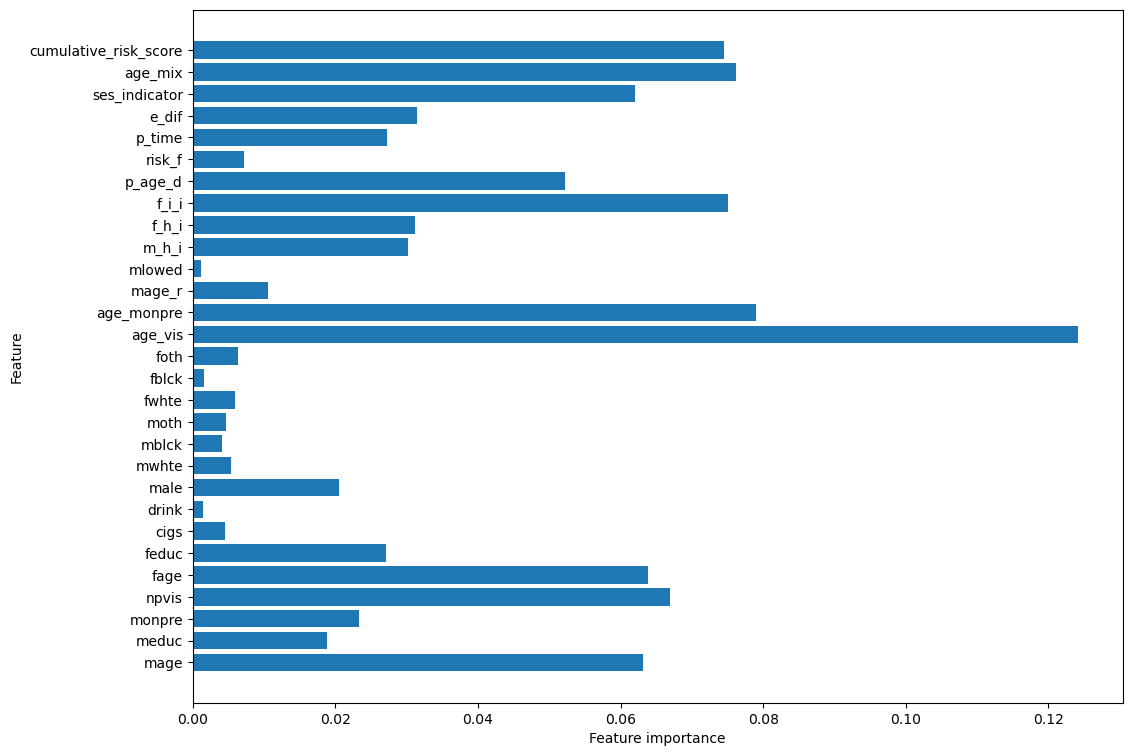

In [37]:
#The following visual represents the importance of features for RandomForest.
#It states that age_vis,cumulative_risk_score, age_monpre, f_i_i, and age_mix are the most important features.
#Some other features are less important and others are almost useless.
#The highest feature is above 0.12 explanatory of the relationship with predicting low_bwght.
#It helps to understand which factors have a greater impact on predictions and how business insights can be derived.

# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [38]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test,
                               y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 78
False Positives: 5
False Negatives: 17
True Positives : 3



-----------------------------------------
    Here, the confusion matrix was done on the test set, but with the same stratification. It shows 0.375 TP/(TP+FP) which is also fine. And 0.16 for False Negatives which is okay. But I am sure to get a better score than this so I will move to GBM model.
    
-----------------------

In [39]:
#The following model has the best proportions so far

weight_for_0 = 1
weight_for_1 = 5  # Assuming you want to make class '1' three times as important
sample_weight = y_train.map({0: weight_for_0, 1: weight_for_1})

In [40]:
# INSTANTIATING the model object without hyperparameters

full_gbm_def = GradientBoostingClassifier(loss          = 'log_loss',
                                              learning_rate = 1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 1,
                                              warm_start    = True,
                                              random_state  = 702)


# FITTING to the training data
full_gbm_def_fit = full_gbm_def.fit(x_train, y_train, sample_weight=sample_weight)


# PREDICTING based on the testing set
full_gbm_def_pred = full_gbm_def_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(full_gbm_def_fit.score(x_train, y_train),
                                  ndigits = 4))
      
print('Testing ACCURACY :', round(full_gbm_def_fit.score(x_test, y_test),
                                  ndigits = 4))
      
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = full_gbm_def_pred),
                                  ndigits = 4))

Training ACCURACY: 0.8856
Testing ACCURACY : 0.6505
AUC Score        : 0.5175


In [41]:
# unpacking the confusion matrix
tuned_gbm_tn, \
tuned_gbm_fp, \
tuned_gbm_fn, \
tuned_gbm_tp = confusion_matrix(y_true = y_test,
                               y_pred = full_gbm_def_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_gbm_tn}
False Positives: {tuned_gbm_fp}
False Negatives: {tuned_gbm_fn}
True Positives : {tuned_gbm_tp}
""")


True Negatives : 61
False Positives: 22
False Negatives: 14
True Positives : 6



In [42]:
# # instantiating a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(2,11,2)
# warm_start_range   = [True,False]
# min_samples_split  = np.arange(2, 21, 2)
# min_samples_leaf   = np.arange(1, 21, 2)
# subsample          = np.arange(0.5, 1.05, 0.1)
# max_features       = ['sqrt', 'log2', None] 


# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range,
#               'min_samples_split'   : min_samples_split,
#               'min_samples_leaf'    : min_samples_leaf,
#               'subsample'     : subsample,
#               'max_features'  : max_features}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 702)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 1000,
#                            random_state        = 702,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(x_train, y_train)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

---------------------------------
Final Model Selection
---------

    This model performed the best. It showed 0.41 precision of TP/(TP+FP) which is the highest so far. Also, the number of False Negatives is the lowest and has a precision of 0.13. So this model performed the best and provided the best predictions.
--------------------------

In [43]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(n_estimators      =250,
                                       learning_rate     =1.1,
                                       max_depth         =6,
                                       warm_start        =False,
                                       min_samples_split = 6,
                                       min_samples_leaf  = 3,
                                       max_features      = 'sqrt',
                                       random_state      =702)



# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(gbm_tuned_fit.score(x_train, y_train),
                            ndigits = 4))


print('Testing  ACCURACY:', round(gbm_tuned_fit.score(x_test, y_test),
                            ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred),
                            ndigits = 4))

Training ACCURACY: 0.9967
Testing  ACCURACY: 0.7767
AUC Score        : 0.6148


In [44]:
# unpacking the confusion matrix
tuned_gbm_tn, \
tuned_gbm_fp, \
tuned_gbm_fn, \
tuned_gbm_tp = confusion_matrix(y_true = y_test,
                               y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_gbm_tn}
False Positives: {tuned_gbm_fp}
False Negatives: {tuned_gbm_fn}
True Positives : {tuned_gbm_tp}
""")


True Negatives : 73
False Positives: 10
False Negatives: 13
True Positives : 7



In [45]:
# storing objects for predictions and true y values
true_y         = y_data.reset_index(drop=True)
pred_probs     = pd.DataFrame(gbm_tuned_fit.predict_proba(x_data)).round(decimals = 2)
pred_thresh_50 = pd.DataFrame(gbm_tuned_fit.predict(x_data))

# combining the predictions into a DataFrame and renaming columns
prediction_df = pd.concat([true_y, pred_probs, pred_thresh_50], axis = 1)
prediction_df.columns = ['true_y', 'prob_0', 'prob_1', 'pred_thresh_50']


# checking results
prediction_df.head()

,true_y,prob_0,prob_1,pred_thresh_50
0,0,1.0,0.0,0
1,1,0.0,1.0,1
2,0,1.0,0.0,0
3,0,1.0,0.0,0
4,0,1.0,0.0,0


In [46]:
# unpacking the confusion matrix
gbm_tn, \
gbm_fp, \
gbm_fn, \
gbm_tp = confusion_matrix(y_true = prediction_df['true_y'],
                             y_pred = prediction_df['pred_thresh_50']).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tn}
False Positives: {gbm_fp}
False Negatives: {gbm_fn}
True Positives : {gbm_tp}
""")


True Negatives : 319
False Positives: 10
False Negatives: 14
True Positives : 66



------------------------------
    On the train data it showed 0.87 precision of TP/(TP+FP) and only 0.03 False Negatives. It is the best performance so far which is why I will stick to this model predictions.

---------------------------

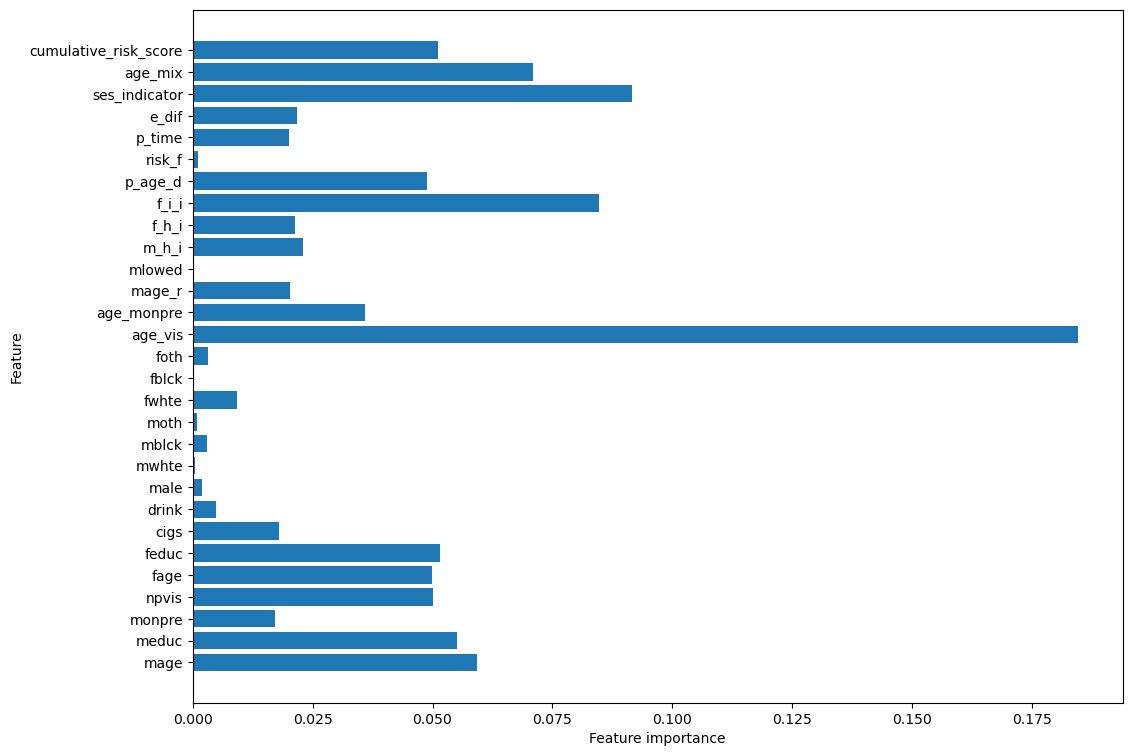

In [47]:
#The following visual represents the impact of features in the GBM Tuned model.
#As we see, the strongest impact on the model have age_vis and ses_indicator.
#age_vis represents the relationship of parents age and the number of visits for the prenatal care.
#And ses_indicator shows the parents socioeconomic status.
#These factors are important as they show a level of care for their baby which makes sense to have
#such influence on the model.

#plotting feature importances
plot_feature_importances(gbm_tuned_fit,
                         train = x_train,
                         export = False)

In [48]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = gbm_tuned_fit.predict(x_data_kaggle)
pred_probs_kaggle = gbm_tuned_fit.predict_proba(x_data_kaggle)

custom_threshold = 0.25

custom_predictions = (pred_probs_kaggle[:, 1] > custom_threshold).astype(int)

## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : custom_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)


model_pred_df.head()

,low_bwght
bwt_id,
bwt_14,0
bwt_16,0
bwt_24,0
bwt_30,0
bwt_57,0


In [50]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./outputs/GBM_above25depth6_noweights.csv",
                     index       = True,
                     index_label = 'bwt_id')